<a href="https://colab.research.google.com/github/fasnaah/term_deposite_ml/blob/main/project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TERM DEPOSIT PREDICTION**

A Machine Learning Project to predict if a client will subscribe (yes/no) to a term deposit.

In this project I will demonstrate how to build a model, to predict which clients will subscribing to a term deposit, with inception of machine learning. In the ﬁrst part we will deal with the description and visualization of the analysed data, and in the second we will go to data classiﬁcation models.


**features**


*   age : age (numeric)
*   job : type of job
*   marital : marital status
*   education : education

*   default: has credit in default?

*   balance in bank account

*   housing: has housing loan?


*   loan: has personal loan?


*   day_of_week: last contact day of the week

*   month: last contact month of year

*   duration: last contact duration, in seconds


*   campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)


*   pdays: number of days that passed by after the client was last contacted from a previous campaign


*   previous: number of contacts performed before this campaign and for this client


*   y : outcome of the previous marketing y - has the client subscribed a term deposit?















In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/dataset_project.csv (1).csv')
df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,999.0,management,married,tertiary,no,2143.0,yes,no,5,may,261,1,-1,0,no
1,44.0,technician,single,secondary,no,29.0,yes,no,5,may,151,1,-1,0,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,5,may,76,1,-1,0,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,5,may,92,1,-1,0,no
4,33.0,unknown,single,unknown,no,1.0,no,no,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825.0,no,no,17,nov,977,3,-1,0,yes
45207,71.0,retired,divorced,primary,no,1729.0,no,no,17,nov,456,2,-1,0,yes
45208,72.0,retired,married,secondary,no,5715.0,no,no,17,nov,1127,5,184,3,yes
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,17,nov,508,4,-1,0,no


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,999.0,management,married,tertiary,no,2143.0,yes,no,5,may,261,1,-1,0,no
1,44.0,technician,single,secondary,no,29.0,yes,no,5,may,151,1,-1,0,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,5,may,76,1,-1,0,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,5,may,92,1,-1,0,no
4,33.0,unknown,single,unknown,no,1.0,no,no,5,may,198,1,-1,0,no


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
45206,51.0,technician,married,tertiary,no,825.0,no,no,17,nov,977,3,-1,0,yes
45207,71.0,retired,divorced,primary,no,1729.0,no,no,17,nov,456,2,-1,0,yes
45208,72.0,retired,married,secondary,no,5715.0,no,no,17,nov,1127,5,184,3,yes
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,17,nov,508,4,-1,0,no
45210,37.0,entrepreneur,married,secondary,no,2971.0,no,no,17,nov,361,2,188,11,no


In [ ]:
df.shape

(45211, 15)

In [ ]:
df.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
y             object
dtype: object

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45202.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.954714,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,11.539144,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,999.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45202 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45208 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   day        45211 non-null  int64  
 9   month      45211 non-null  object 
 10  duration   45211 non-null  int64  
 11  campaign   45211 non-null  int64  
 12  pdays      45211 non-null  int64  
 13  previous   45211 non-null  int64  
 14  y          45211 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 5.2+ MB


In [ ]:
df.isna().sum()

age          9
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [ ]:
for col in df.columns: #To Know unique values
    print(col,' ',df[col].nunique())

age   79
job   12
marital   3
education   4
default   2
balance   7168
housing   2
loan   2
day   31
month   12
duration   1573
campaign   48
pdays   559
previous   41
y   2


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

In [ ]:
for col in df.columns:
  print(col)
  print(df[col].nunique())
  print('-'*100)


age
79
----------------------------------------------------------------------------------------------------
job
12
----------------------------------------------------------------------------------------------------
marital
3
----------------------------------------------------------------------------------------------------
education
4
----------------------------------------------------------------------------------------------------
default
2
----------------------------------------------------------------------------------------------------
balance
7168
----------------------------------------------------------------------------------------------------
housing
2
----------------------------------------------------------------------------------------------------
loan
2
----------------------------------------------------------------------------------------------------
day
31
----------------------------------------------------------------------------------------------------
month
12

In [ ]:
for col in df.columns:
  print(col)
  print(df[col].unique())
  print('-'*100)


age
[999.  44.  33.  47.  35.  28.  nan  58.  43.  41.  29.  53.  57.  51.
  45.  60.  56.  32.  25.  40.  39.  52.  46.  36.  49.  59.  37.  50.
  54.  55.  48.  31.  42.  30.  27.  34.  38.  23.  26.  61.  22.  24.
  21.  20.  66.  62.  83.  75.  67.  70.  65.  68.  64.  69.  72.  71.
  19.  76.  85.  63.  90.  82.  73.  74.  78.  80.  94.  79.  77.  86.
  95.  81.  18.  89.  84.  87.  92.  93.  88.  -1.]
----------------------------------------------------------------------------------------------------
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
----------------------------------------------------------------------------------------------------
marital
['married' 'single' 'divorced']
----------------------------------------------------------------------------------------------------
education
['tertiary' 'secondary' 'unknown' 'primary']
-------------------------------------

# **FEATURE SELECTION**

In [ ]:
df.corr()

NameError: name 'df' is not defined

<ipython-input-15-fe2252758f39>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

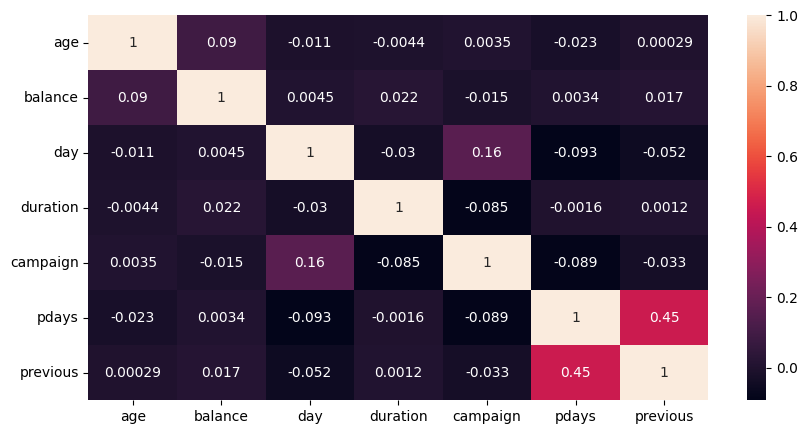

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

# **CHI SQUARE & ANNOVA TEST**

In [ ]:
df_copy=df.copy()
#Label encoding before feature selection
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df_copy.columns:
  df_copy[col]=le.fit_transform(df_copy[col])
df_copy

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,78,4,1,2,0,3036,1,0,4,8,261,0,0,0,0
1,27,9,2,1,0,945,1,0,4,8,151,0,0,0,0
2,16,2,1,1,0,918,1,1,4,8,76,0,0,0,0
3,30,1,1,3,0,2420,1,0,4,8,92,0,0,0,0
4,16,11,2,3,0,917,0,0,4,8,198,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,34,9,1,2,0,1741,0,0,16,9,975,2,0,0,1
45207,54,5,0,0,0,2639,0,0,16,9,456,1,0,0,1
45208,55,5,1,1,0,5455,0,0,16,9,1116,4,181,3,1
45209,40,1,1,1,0,1584,0,0,16,9,508,3,0,0,0


In [ ]:
x_discrete=df_copy[['job', 'marital', 'education', 'default', 'housing', 'loan', 'month']]
x_continuous=df_copy[['age' ,	'balance'	,'day' 	,'duration' ,	'campaign' ,	'pdays' ,	'previous']]
y_copy=df_copy.iloc[:,-1]


In [ ]:
#Chi Square Test for feature selection in case of discrete input labels
from sklearn.feature_selection import chi2
score1=chi2(x_discrete,y_copy)
score1

(array([182.45226044,  29.76606652,  90.61772256,  22.31387496,
        388.94971474, 176.51613693,  44.32190507]),
 array([1.41257633e-41, 4.87449759e-08, 1.74292216e-21, 2.31527677e-06,
        1.40128480e-86, 2.79337524e-40, 2.78581489e-11]))

In [ ]:
f_value1=pd.Series(score1[0],index=x_discrete.columns)
f_value1.sort_values(ascending=False)

housing      388.949715
job          182.452260
loan         176.516137
education     90.617723
month         44.321905
marital       29.766067
default       22.313875
dtype: float64

In [ ]:
p_value1=pd.Series(score1[1],index=x_discrete.columns)
p_value1.sort_values(ascending=False)

default      2.315277e-06
marital      4.874498e-08
month        2.785815e-11
education    1.742922e-21
loan         2.793375e-40
job          1.412576e-41
housing      1.401285e-86
dtype: float64

In [ ]:
#Annova Test for feature selection in case of continuous input labels
from sklearn.feature_selection import f_classif
score2=f_classif(x_continuous,y_copy)
score2

(array([  26.58010222,  311.62865296,   36.35900965, 9021.94787625,
         245.7274607 ,  470.12762293,  599.58462133]),
 array([2.53897219e-007, 1.65228194e-069, 1.65388016e-009, 0.00000000e+000,
        3.10161380e-055, 1.01716123e-103, 1.48875810e-131]))

In [ ]:
f_value2=pd.Series(score2[0],index=x_continuous.columns)
f_value2.sort_values(ascending=False)

duration    9021.947876
previous     599.584621
pdays        470.127623
balance      311.628653
campaign     245.727461
day           36.359010
age           26.580102
dtype: float64

In [ ]:
p_value2=pd.Series(score2[1],index=x_continuous.columns)
p_value2.sort_values(ascending=False)

age          2.538972e-07
day          1.653880e-09
campaign     3.101614e-55
balance      1.652282e-69
pdays       1.017161e-103
previous    1.488758e-131
duration     0.000000e+00
dtype: float64

# **VISUALIZATION**

no     39922
yes     5289
Name: y, dtype: int64

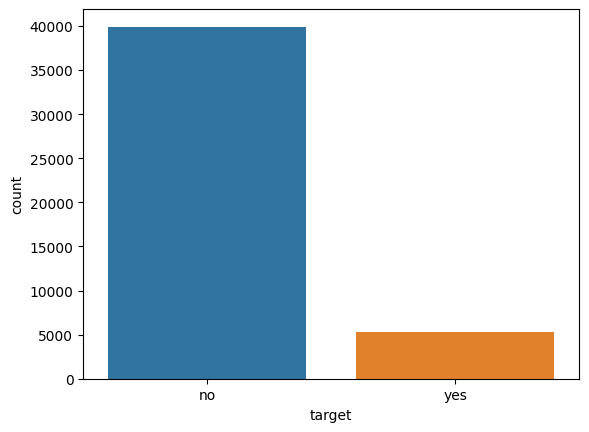

In [ ]:
sns.countplot(x=df['y'])
plt.xlabel('target')

df['y'].value_counts()

Based on this analysis, we can conclude that the dataset is imbalanced.

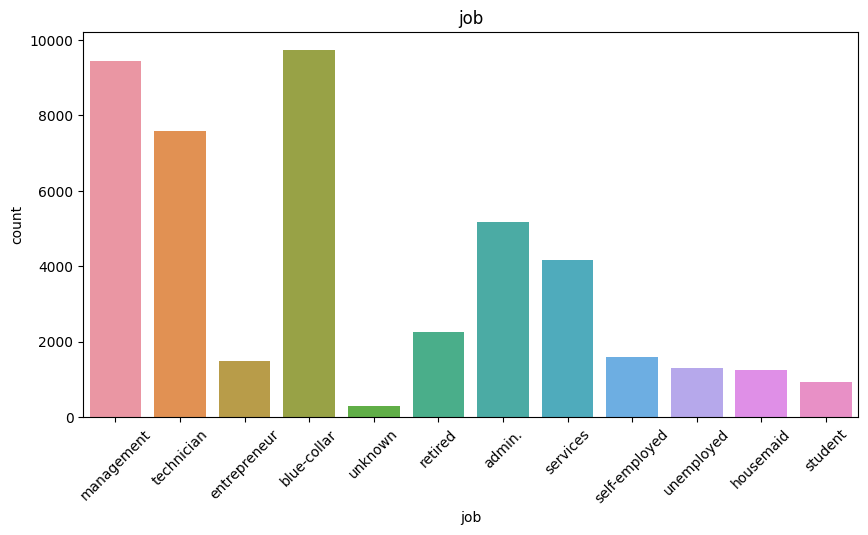

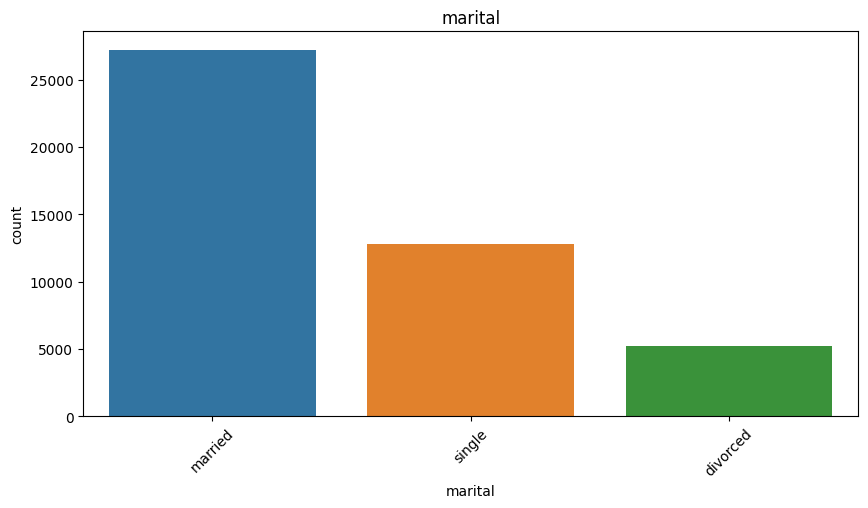

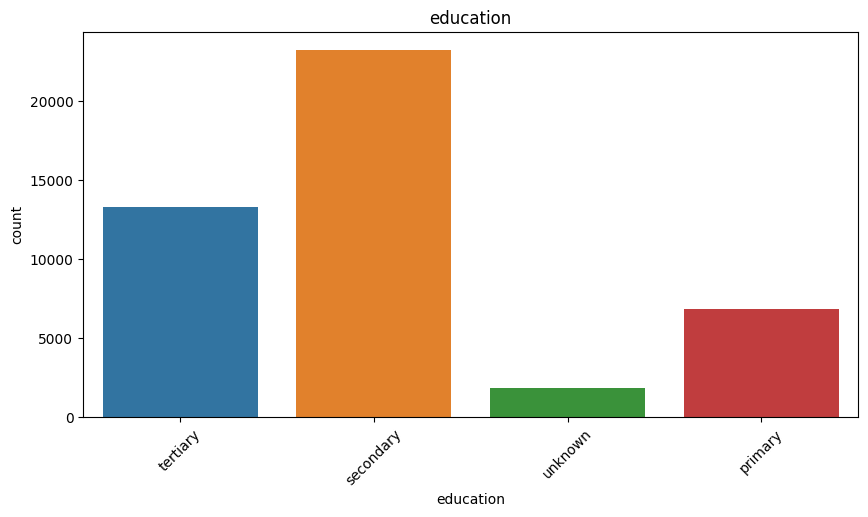

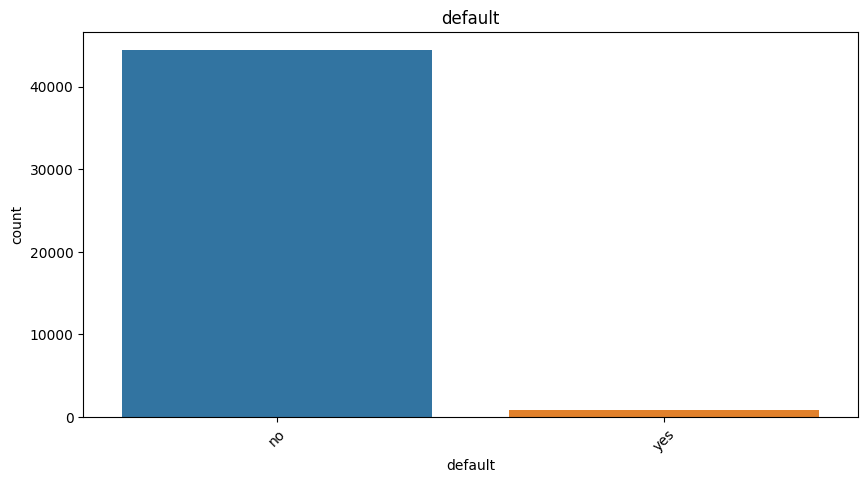

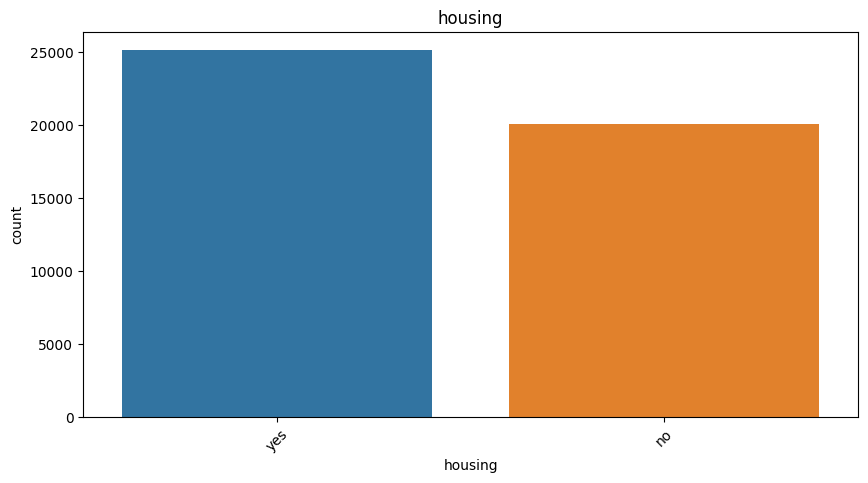

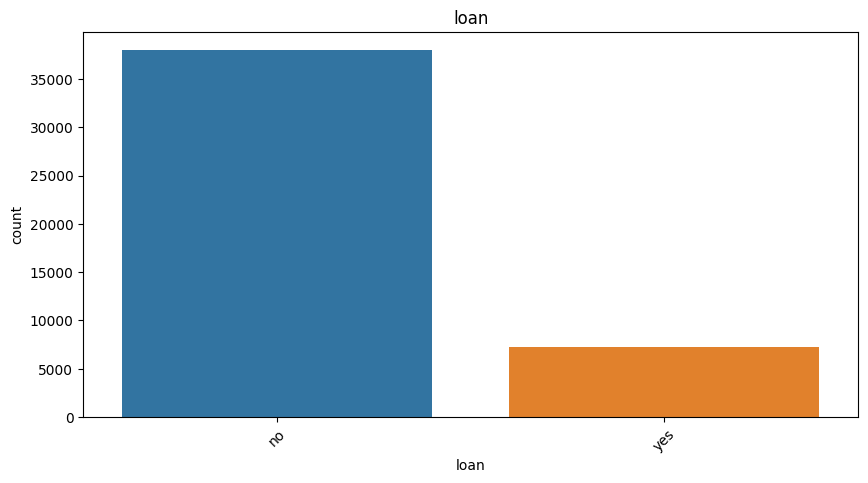

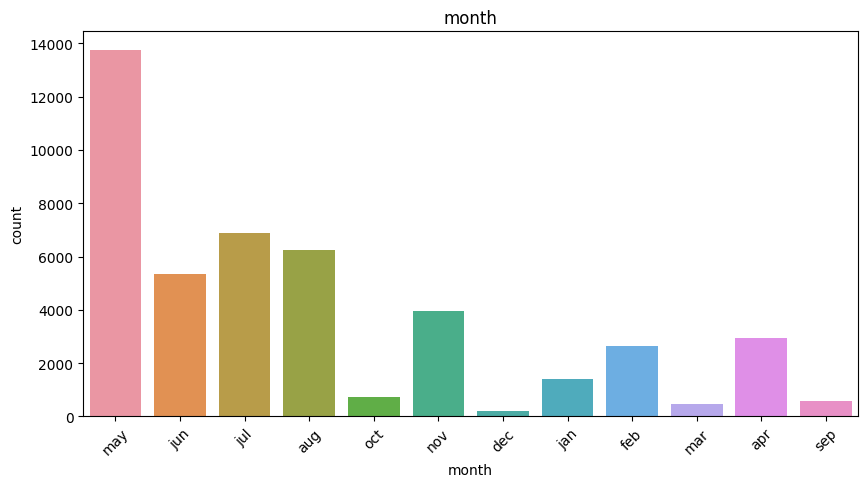

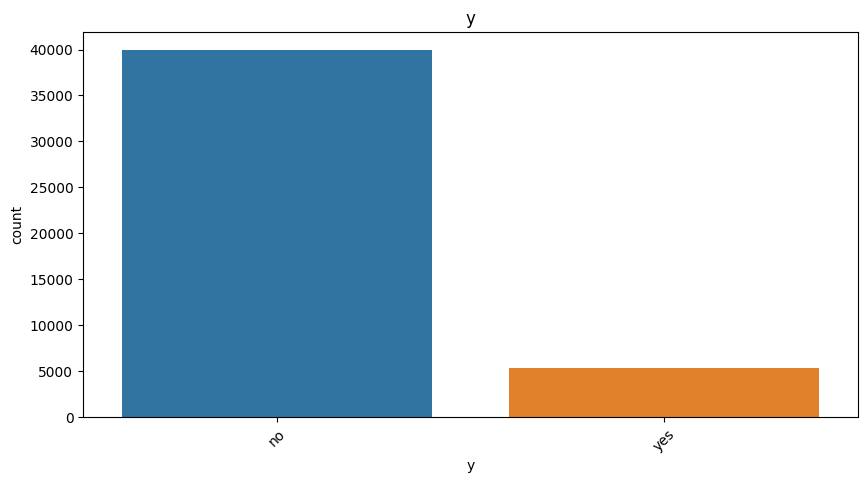

In [ ]:
#univariate analysis
import seaborn as sns
categorical_cols= [col for col in df.columns if df[col].dtype == 'object']
for i in categorical_cols:
  plt.figure(figsize=(10,5))
  sns.countplot(x=i,data=df)
  plt.title(i)
  plt.xticks(rotation=45)



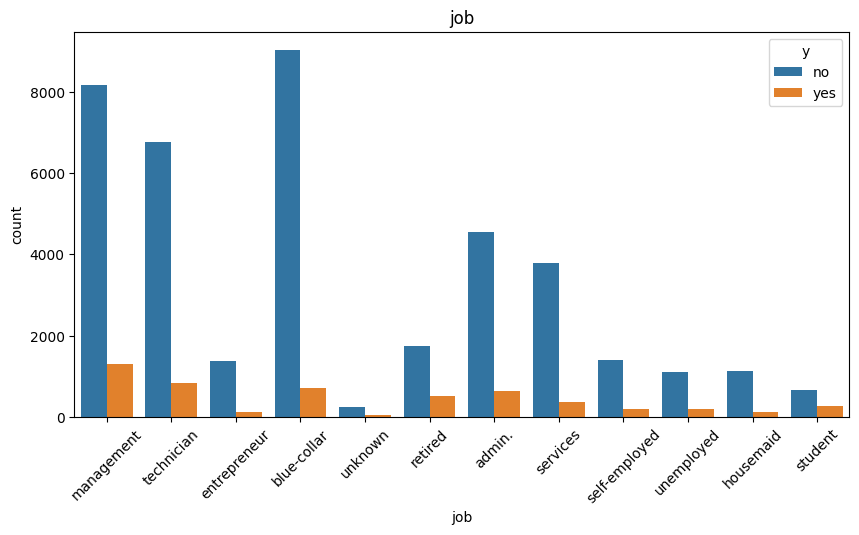

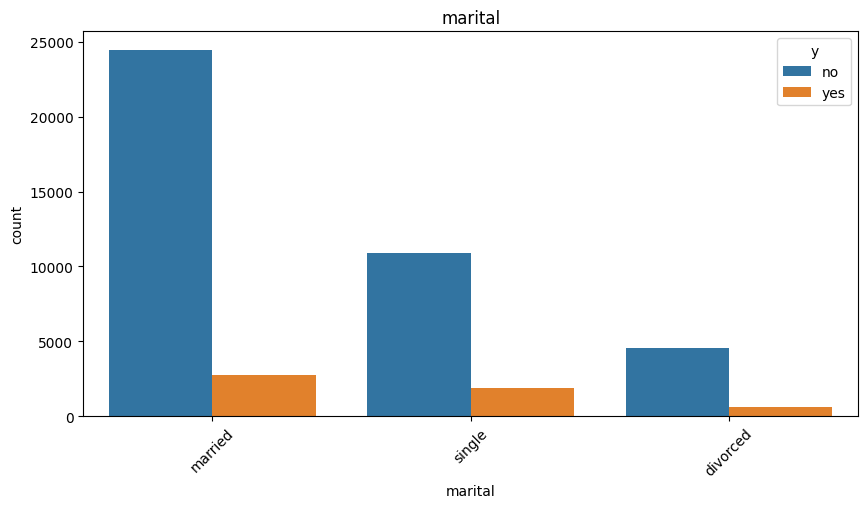

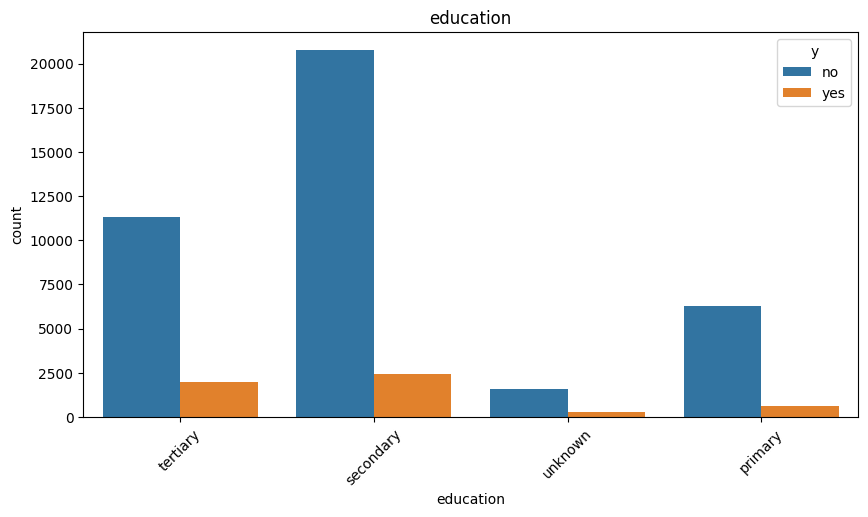

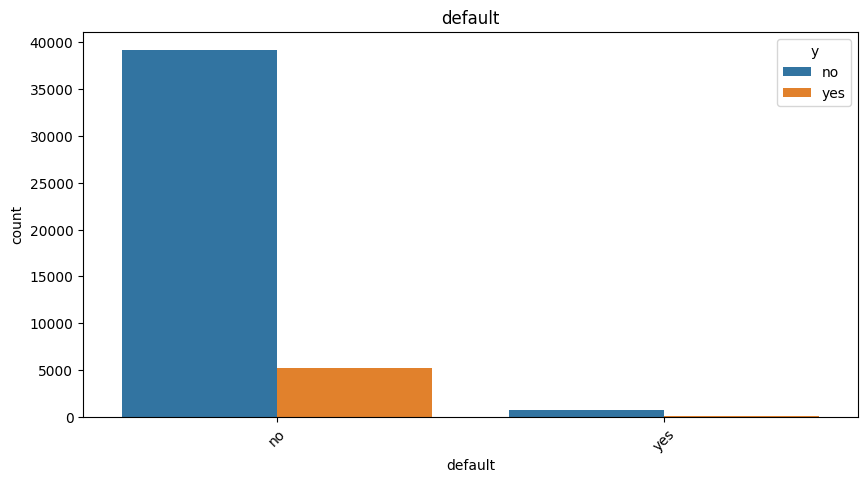

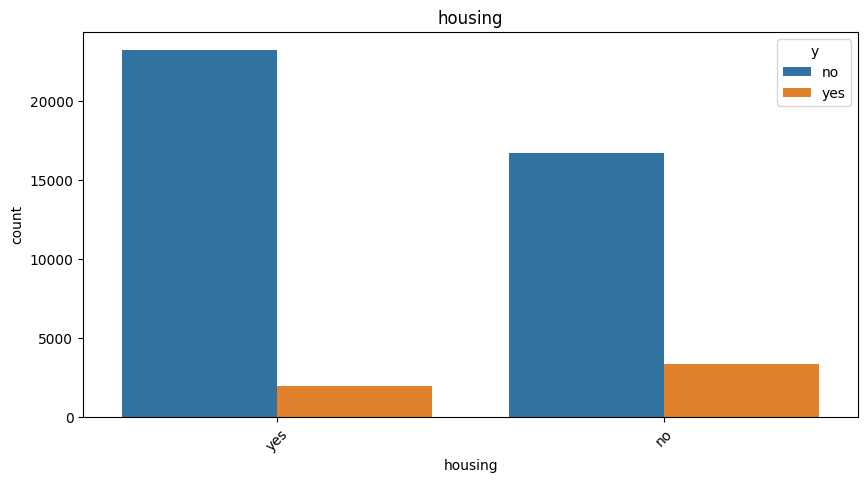

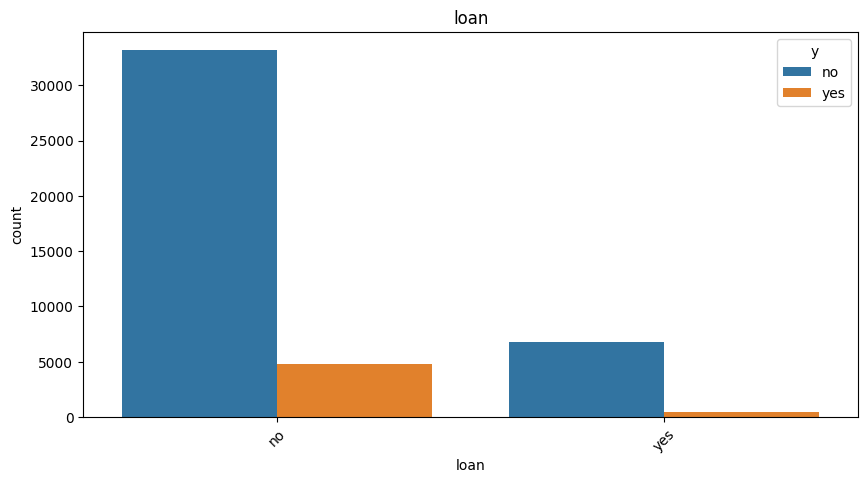

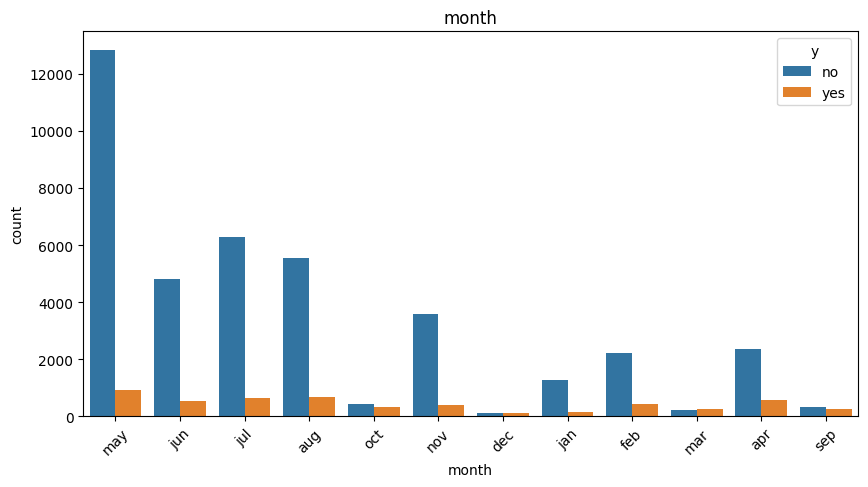

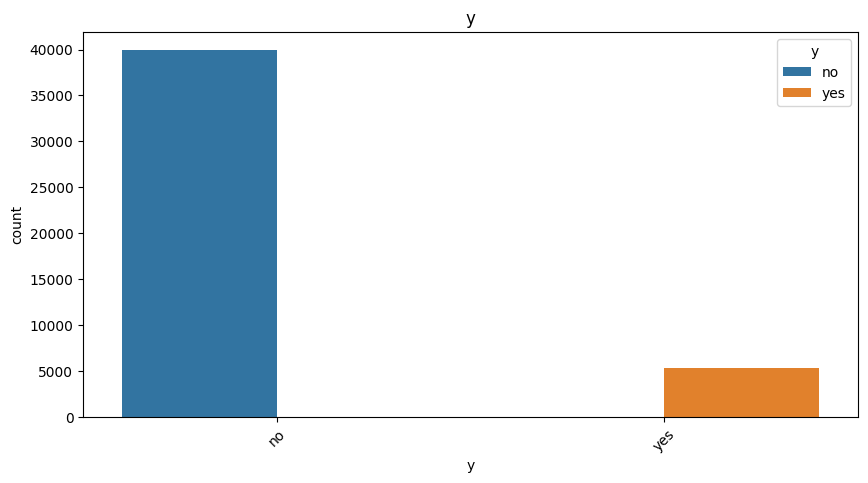

In [ ]:
#bivariate analysis
for i in categorical_cols:
  plt.figure(figsize=(10,5))
  sns.countplot(x=df[i],hue=df['y'])
  plt.title(i)
  plt.xticks(rotation=45)


In [ ]:
import pandas as pd
contingency_table = pd.crosstab(df['marital'], df['housing'], margins=True, margins_name="Total")
contingency_table

housing,no,yes,Total
marital,,,
divorced,2300,2907,5207
married,11893,15321,27214
single,5888,6902,12790
Total,20081,25130,45211


# **HANDLING MISSING VALUES**


In [ ]:
df.isna().sum()

age          9
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [ ]:
df['age'] = df['age'].fillna(df['age'].median())    # Filing the null values with median
df['balance'] = df['balance'].fillna(df['balance'].median()) # Filing the null values with median

In some columns,missing values has been represented as unknown

In [ ]:
for i in categorical_cols:
  mode=df[i].mode()[0]
  df[i]=df[i].replace('unknown',mode)

# **DEALING WITH OUTLIERS**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


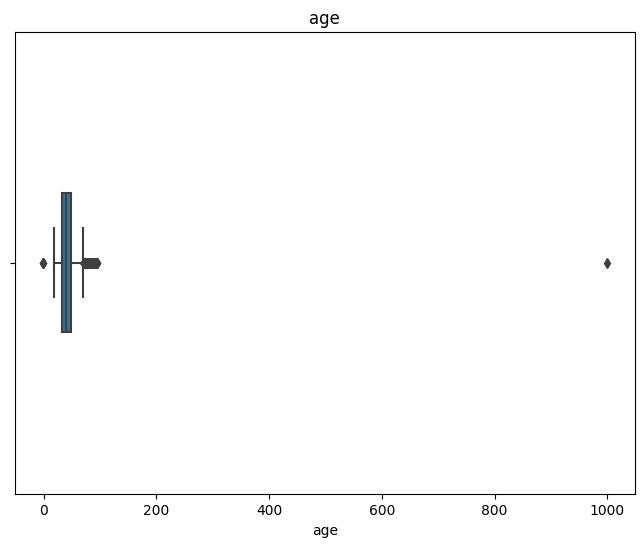

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


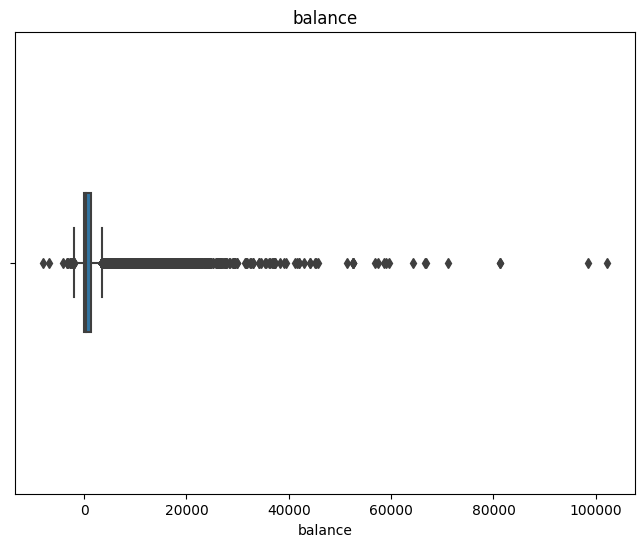

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


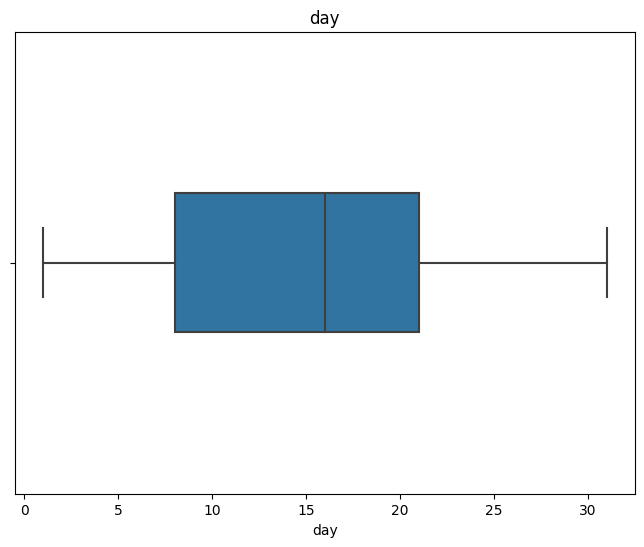

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


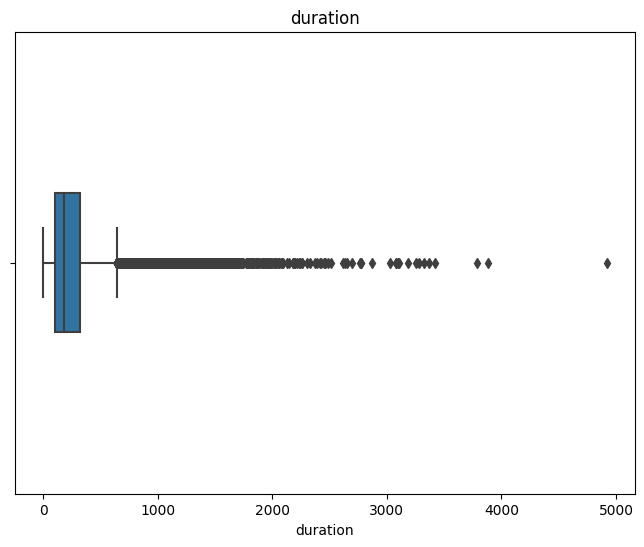

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


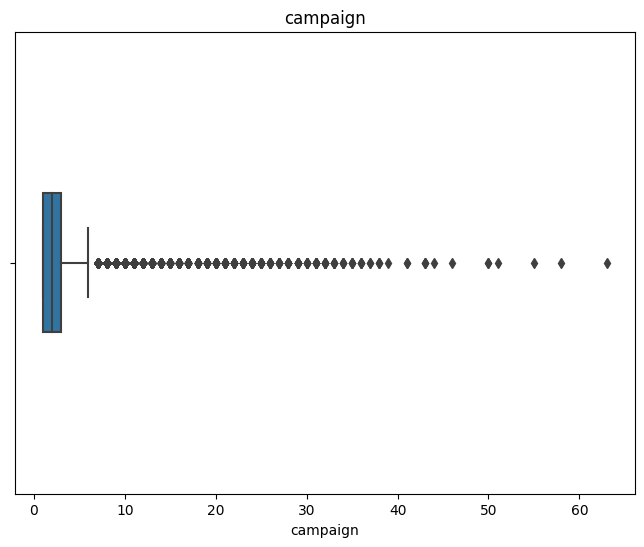

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


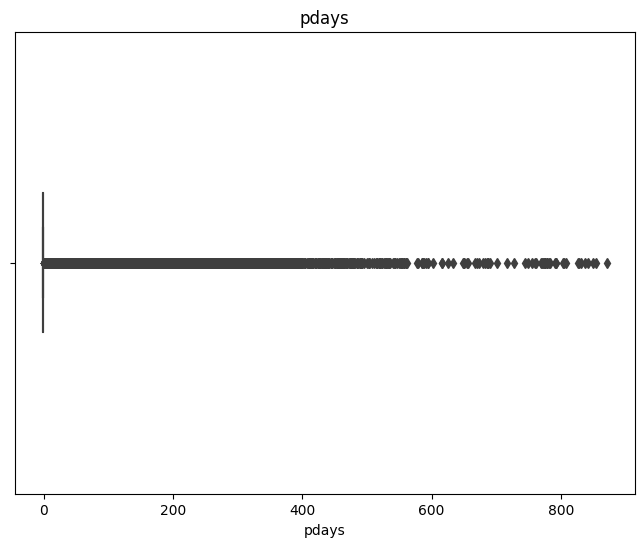

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


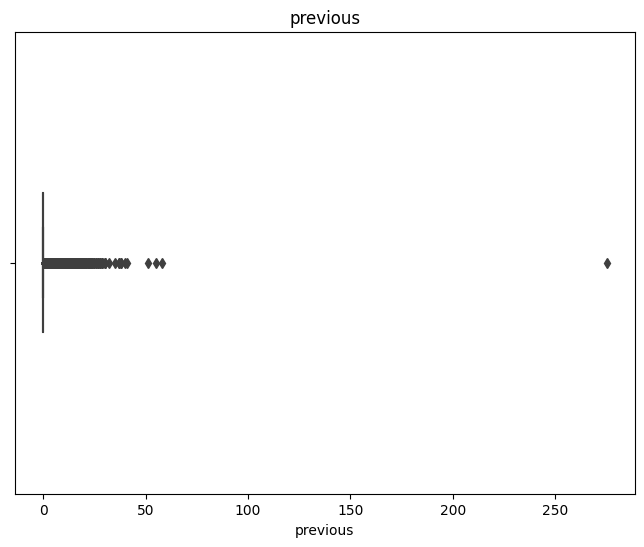

In [ ]:

numerical_cols=['age','balance','day','duration', 'campaign', 'pdays','previous']
for i in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=i , data=df, orient='v', width=0.3)
    plt.title(i)
    plt.show()

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
df= df[~((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)]


<ipython-input-32-6865bb37bd72>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-32-6865bb37bd72>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-32-6865bb37bd72>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df= df[~((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)]


# **ENCODING USING GET_DUMMIES**

In [ ]:
df1=pd.get_dummies(df[['job', 'marital', 'education', 'default', 'housing', 'loan']],drop_first=True)
df1

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes
1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45196,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
45197,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0
45198,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
45202,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [ ]:
newdf=pd.concat([df,df1],axis=1)
newdf

,age,job,marital,education,default,balance,housing,loan,day,month,...,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes
1,44.0,technician,single,secondary,no,29.0,yes,no,5,may,...,0,1,0,0,1,1,0,0,1,0
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,5,may,...,0,0,0,1,0,1,0,0,1,1
3,47.0,blue-collar,married,secondary,no,1506.0,yes,no,5,may,...,0,0,0,1,0,1,0,0,1,0
4,33.0,blue-collar,single,secondary,no,1.0,no,no,5,may,...,0,0,0,0,1,1,0,0,0,0
5,35.0,management,married,tertiary,no,231.0,yes,no,5,may,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45196,25.0,student,single,secondary,no,358.0,no,no,16,nov,...,1,0,0,0,1,1,0,0,0,0
45197,36.0,management,single,secondary,no,1511.0,yes,no,16,nov,...,0,0,0,0,1,1,0,0,1,0
45198,37.0,management,married,tertiary,no,1428.0,no,no,16,nov,...,0,0,0,1,0,0,1,0,0,0
45202,34.0,admin.,single,secondary,no,557.0,no,no,17,nov,...,0,0,0,0,1,1,0,0,0,0


In [ ]:
newdf1=newdf.drop(['job', 'marital', 'education', 'default', 'housing', 'loan'],axis=1)
newdf1

,age,balance,day,month,duration,campaign,pdays,previous,y,job_blue-collar,...,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes
1,44.0,29.0,5,may,151,1,-1,0,no,0,...,0,1,0,0,1,1,0,0,1,0
2,33.0,2.0,5,may,76,1,-1,0,no,0,...,0,0,0,1,0,1,0,0,1,1
3,47.0,1506.0,5,may,92,1,-1,0,no,1,...,0,0,0,1,0,1,0,0,1,0
4,33.0,1.0,5,may,198,1,-1,0,no,1,...,0,0,0,0,1,1,0,0,0,0
5,35.0,231.0,5,may,139,1,-1,0,no,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45196,25.0,358.0,16,nov,330,1,-1,0,yes,0,...,1,0,0,0,1,1,0,0,0,0
45197,36.0,1511.0,16,nov,270,1,-1,0,yes,0,...,0,0,0,0,1,1,0,0,1,0
45198,37.0,1428.0,16,nov,333,2,-1,0,no,0,...,0,0,0,1,0,0,1,0,0,0
45202,34.0,557.0,17,nov,224,1,-1,0,yes,0,...,0,0,0,0,1,1,0,0,0,0


In [ ]:
newdf1['month'] = df['month'].map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
#manual encoding for months to keep months as per numerical order



# **SEPARATING INDEPENDENT AND DEPENDENT VARIABLES**

In [ ]:
x = newdf1.drop('y', axis=1)
y = newdf1['y']

# **HANDLING IMBALANCED DATASET**

no     26593
yes     1597
Name: y, dtype: int64

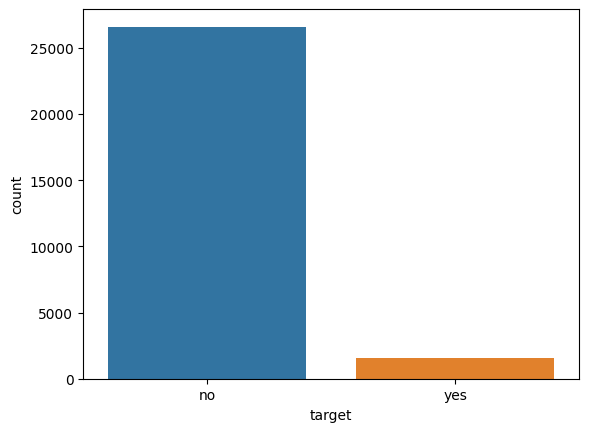

In [ ]:
sns.countplot(x=df['y'])
plt.xlabel('target')

df['y'].value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto',random_state=42)
x_balanced,y_balanced=smote.fit_resample(x,y)
y_balanced.value_counts()

no     26593
yes    26593
Name: y, dtype: int64

# **SEPARATING TRAINING DATA & TESTING DATA**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_balanced,y_balanced,test_size=0.30,random_state=42)

# **NORMALIZATION**

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

# **MODEL CREATION**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier()
param={'n_neighbors':[3,5,7,9],'weights':['uniform','distance']}

**GRIDSEARCHCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(knn1,param,cv=10,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)

{'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
#Model creation
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(x_train,y_train)
y_prediction=knn.predict(x_test)
y_prediction

array(['yes', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

**PERFORMANCE EVALUATION**

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
#confusion matrix
matr=confusion_matrix(y_test,y_prediction)
print(matr)

[[7469  513]
 [ 363 7611]]


In [ ]:
#accuracy score
score=accuracy_score(y_test,y_prediction)
score

0.9450990223113562

In [ ]:
#classification report
report=classification_report(y_test,y_prediction)
print(report)

              precision    recall  f1-score   support

          no       0.95      0.94      0.94      7982
         yes       0.94      0.95      0.95      7974

    accuracy                           0.95     15956
   macro avg       0.95      0.95      0.95     15956
weighted avg       0.95      0.95      0.95     15956



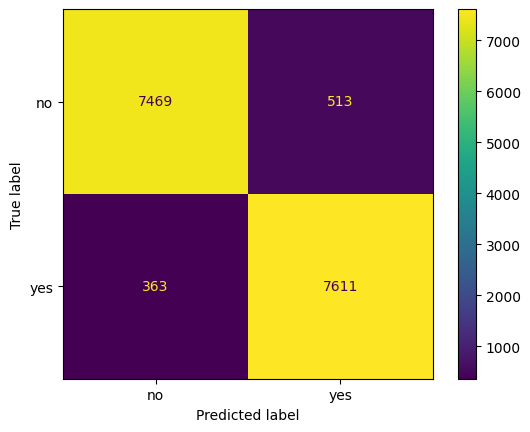

In [ ]:
#confusion matrix display
labels=['no','yes']
cmd=ConfusionMatrixDisplay(matr,display_labels=labels)
cmd.plot()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

knn=KNeighborsClassifier(n_neighbors=7)
model2 = RandomForestClassifier(criterion = 'entropy',n_estimators=100,random_state=33)
model3 = DecisionTreeClassifier(criterion = 'entropy')
base=BernoulliNB()
model=SVC()
lst=[knn,model2,base,model,model3]

for i in lst:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(confusion_matrix(y_test,y_pred))
  print(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print('*'*100)


KNeighborsClassifier(n_neighbors=7)
[[7435  547]
 [ 464 7510]]
0.936638255201805
              precision    recall  f1-score   support

          no       0.94      0.93      0.94      7982
         yes       0.93      0.94      0.94      7974

    accuracy                           0.94     15956
   macro avg       0.94      0.94      0.94     15956
weighted avg       0.94      0.94      0.94     15956

****************************************************************************************************
RandomForestClassifier(criterion='entropy', random_state=33)
[[7723  259]
 [ 340 7634]]
0.9624592629731762
              precision    recall  f1-score   support

          no       0.96      0.97      0.96      7982
         yes       0.97      0.96      0.96      7974

    accuracy                           0.96     15956
   macro avg       0.96      0.96      0.96     15956
weighted avg       0.96      0.96      0.96     15956

*********************************************************